Задание.


1. Загрузить таблицу Iris из репозитория UCI (можно из любого доступного источника: UCI, sklearn, kaggle). Поместить данные в объект DataFrame библиотеки pandas.
Вычислить корреляции между признаками на всей таблице и отдельно по классам (использовать pd.groupby).
Визуализировать распределения классов на всех парах переменных.

2. Выбрать две переменные. Построить и визуализировать (показать разделяющую кривую) решения методами линейный и квадратичный дискриминант, логистическая регрессия, SVM (линейное и квадратичное ядро). Пример подходящей визуализации есть в sklearn.

В следующих заданиях можно оставить только два (наименее разделимых) класса.

3. Построить линейный дискриминант на всех переменных. Визуализировать ответы алгоритма (выделить, например, цветом) и классы объектов (выделить, например, формой маркеров) во всех двумерных подпространствах.

4. На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

Загрузка данных

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['name'] = [iris.target_names[i] for i in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Корреляция измеряет степень линейной зависимости между двумя переменными. Она всегда находится в диапазоне между -1 и 1:


*   Корреляция, близкая к 1, указывает на сильную положительную линейную взаимосвязь.
*   Корреляция, близкая к -1, указывает на сильную отрицательную линейную взаимосвязь.
*   Корреляция, близкая к 0, указывает на слабую или отсутствующую линейную взаимосвязь.

Корреляции для всей таблицы

Памятка:

In [3]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Корреляции для каждого класса

In [4]:
grouped_correlations = df.groupby('name').apply(lambda group: group.corr(numeric_only=True))
grouped_correlations

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   

                              petal length (cm)  petal width (cm)  
name                                                               
setosa     sepal length (cm)           0.267176          0.278098  
           sepal width (cm)            0.177700          0.232752  
           petal length (cm)           1.000000          0.331630  
           petal width (cm)            0.331630          1.000000  
versicolor sepal length (cm)           0.754049          0.546461  
           sepal width (cm)            0.560522          0.663999  
           petal length (cm)           1.000000          0.786668  
           petal width (cm)            0.786668          1.000000  
virginica  sepal length (cm)           0.864225          0.281108  
           sepal width (cm)            0.401045          0.537728  
           petal length (cm)           1.000000          0.322108  
           petal width (cm)            0.322108          1.000000

Визуализация распределений классов на всех парах переменных.

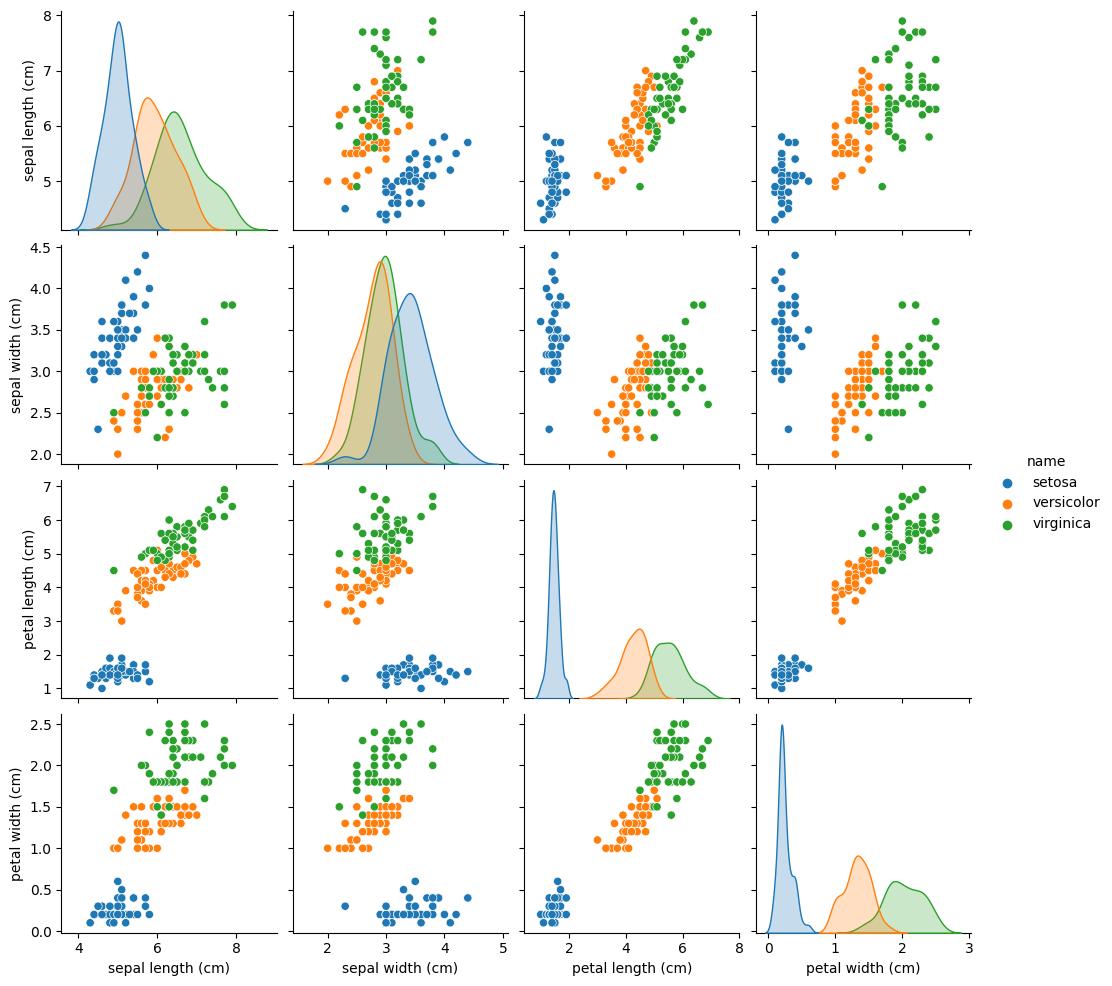

In [5]:
sns.pairplot(df, hue='name')
plt.show()

Оставляем два класса

In [6]:
# Добавляем столбец с целевой переменной:
df['target'] = iris.target
# Оставляем два класса
df = df.loc[df['target']!=0]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,target
50,7.0,3.2,4.7,1.4,versicolor,1
51,6.4,3.2,4.5,1.5,versicolor,1
52,6.9,3.1,4.9,1.5,versicolor,1
53,5.5,2.3,4.0,1.3,versicolor,1
54,6.5,2.8,4.6,1.5,versicolor,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [7]:
# Функция строит график произвольной функции f от двух переменных.
# Агрумент функции f задаётся в виде массива из двух столбцов

def plot_contours(ax, f, x_min,x_max,y_min,y_max, h=.02):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = f(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    return out

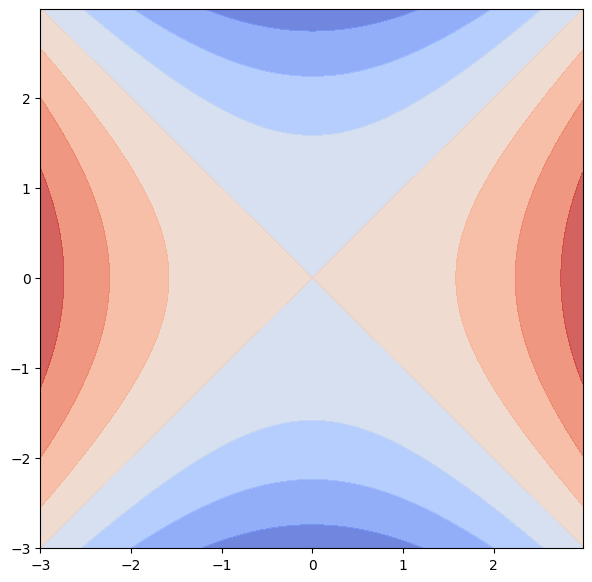

In [8]:
fig, ax = plt.subplots(1, 1,figsize=(7,7))

# Для примера нарисуем гиперболоид
plot_contours(ax,lambda x: x[:,0]**2 - x[:,1]**2, -3,3,-3,3)

In [9]:
# Воспользуемся библиотечным классификатором
# Выбираем две любые переменные
X = df.iloc[:,[0,3]]
y = df['target']

Квадратичный дискриминант

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


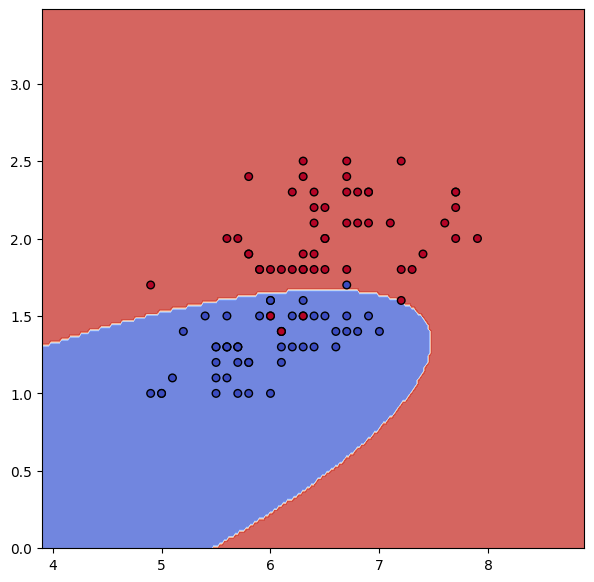

In [10]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X,y)

fig, ax = plt.subplots(1, 1,figsize=(7,7))
plot_contours(ax,clf.predict,X.iloc[:,0].min()-1,X.iloc[:,0].max()+1,X.iloc[:,1].min()-1,X.iloc[:,1].max()+1)
ax.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

Линейный дискриминант

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


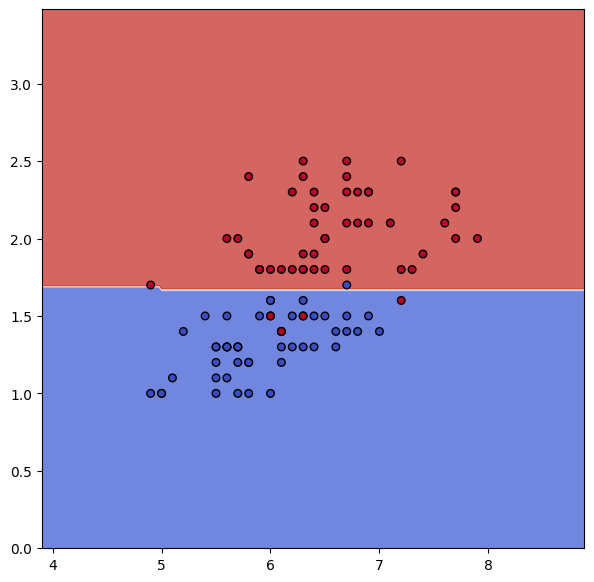

In [11]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

fig, ax = plt.subplots(1, 1,figsize=(7,7))

plot_contours(ax,clf.predict,X.iloc[:,0].min()-1,X.iloc[:,0].max()+1,X.iloc[:,1].min()-1,X.iloc[:,1].max()+1)

ax.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

Логистическая регрессия

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


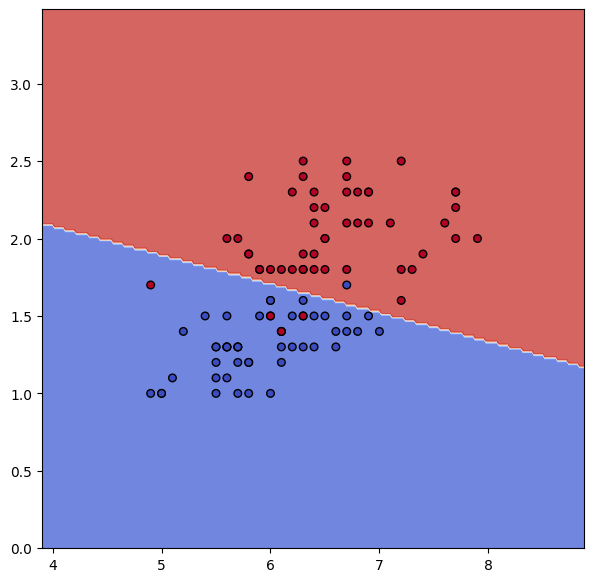

In [12]:
clf = LogisticRegression()
clf.fit(X,y)

fig, ax = plt.subplots(1, 1,figsize=(7,7))

plot_contours(ax,clf.predict,X.iloc[:,0].min()-1,X.iloc[:,0].max()+1,X.iloc[:,1].min()-1,X.iloc[:,1].max()+1)

ax.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

SVM(линейное и квадратичное ядро)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


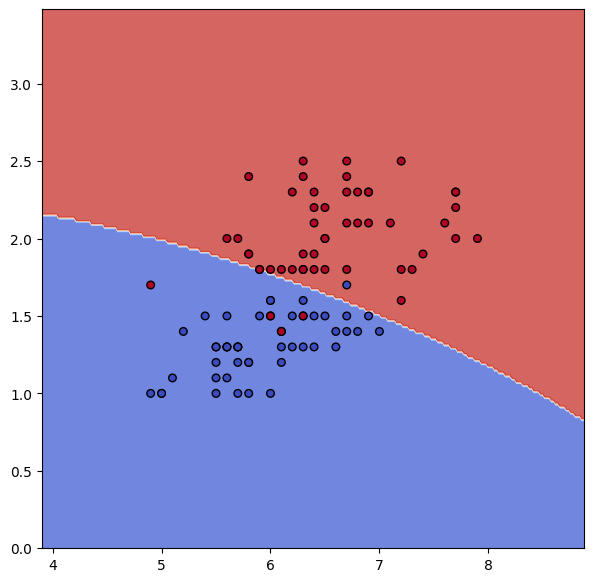

In [13]:
clf = SVC()
clf.fit(X,y)

fig, ax = plt.subplots(1, 1,figsize=(7,7))

plot_contours(ax,clf.predict,X.iloc[:,0].min()-1,X.iloc[:,0].max()+1,X.iloc[:,1].min()-1,X.iloc[:,1].max()+1)

ax.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

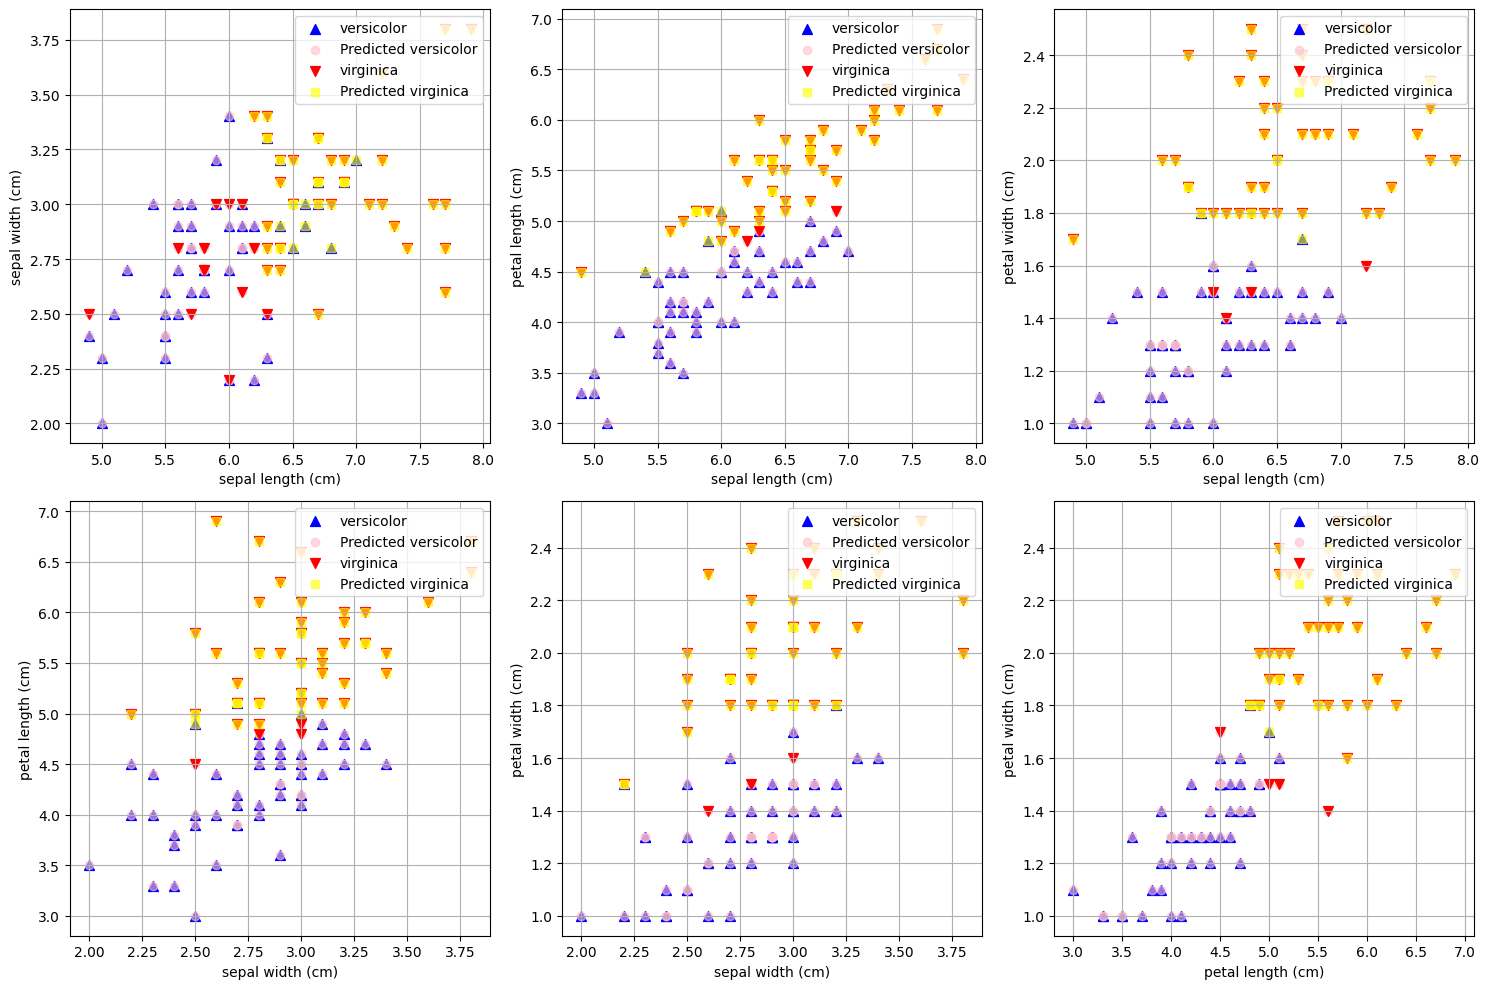

In [14]:
# Инициализируем LDA
lda = LinearDiscriminantAnalysis()

# Создаем subplots
num_features = len(df.columns) - 2  # исключаем столбцы 'target' и 'name'
num_combinations = num_features * (num_features - 1) // 2
num_rows = (num_combinations + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
current_ax = 0

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for i, feature_i in enumerate(features):
    for j, feature_j in enumerate(features):
        if i < j:
            # Тренируем LDA
            X = df[[feature_i, feature_j]].values
            y = df['target'].values
            lda.fit(X, y)

            # Предсказываем значения
            pred = lda.predict(X)

            # Визуализируем результаты
            ax = axes[current_ax // 3, current_ax % 3]
            for target, real_marker, pred_marker, color, pred_color in zip([1, 2], ['^', 'v'], ['o', 's'], ['blue', 'red'], ['pink', 'yellow']):
                ax.scatter(X[y == target, 0], X[y == target, 1], marker=real_marker, color=color, s=50, label=iris.target_names[target])
                ax.scatter(X[pred == target, 0], X[pred == target, 1], marker=pred_marker, color=pred_color, alpha=0.6, label=f'Predicted {iris.target_names[target]}')
            ax.set_xlabel(feature_i)
            ax.set_ylabel(feature_j)
            ax.legend(loc='upper right')
            ax.grid(True)
            current_ax += 1

plt.tight_layout()
plt.show()

Ковариация измеряет совместные изменения двух случайных величин. Ковариация может быть положительной, отрицательной или равной нулю:
*   Положительная ковариация указывает на то, что две переменные склонны расти вместе.
*   Отрицательная ковариация указывает на то, что одна переменная склонна расти, когда другая уменьшается.
*   Если ковариация равна нулю, это может указывать на отсутствие линейной взаимосвязи между переменными.

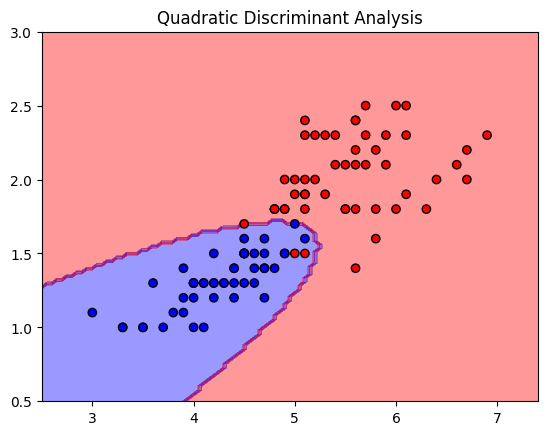

In [16]:
# Вычисляем средние и ковариационные матрицы для каждого класса
# Здесь создаются два словаря для хранения средних значений и ковариационных матриц для каждого из двух классов.
means = {}
covs = {}
# Для каждого класса (1 и 2) выделяется подмножество данных, затем вычисляются средние значения и ковариационные матрицы этого подмножества.
for target in [1, 2]:
    subset = X[y == target]
    means[target] = np.mean(subset, axis=0)
    covs[target] = np.cov(subset, rowvar=False)

# Квадратичная разделяющая функция
# Функция вычисляет значение квадратичной разделяющей функции для данной точки x. Это делается путем измерения "расстояния" от x до каждого класса, учитывая средние значения и ковариационные матрицы.
def quadratic_discriminant(x, mean, cov):
    return -0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean)) - 0.5 * np.log(np.linalg.det(cov))

# Классификация
# Функция классифицирует каждую точку x путем вычисления квадратичной разделяющей функции для каждого класса и выбора класса с максимальным значением.
def classify(x):
    scores = {target: quadratic_discriminant(x, means[target], covs[target]) for target in [1, 2]}
    return max(scores, key=scores.get)

# Визуализация
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                     np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))

Z = np.array([classify(np.array([xi, yi])) for xi, yi in zip(np.ravel(xx), np.ravel(yy))])
Z = Z.reshape(xx.shape)

colors = np.where(y == 1, 'blue', 'red')
plt.contourf(xx, yy, Z,colors=['blue', 'red'], alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='k')
plt.title('Quadratic Discriminant Analysis')
plt.show()